In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import ChemicalFeatures, Descriptors
from rdkit import RDConfig
from rdkit.Chem.Fingerprints import FingerprintMols
from keras.utils import np_utils
import pandas as pd
import gzip
import csv
import os
import io
from collections import Counter
fdefName = os.path.join(RDConfig.RDDataDir, 'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

Using TensorFlow backend.


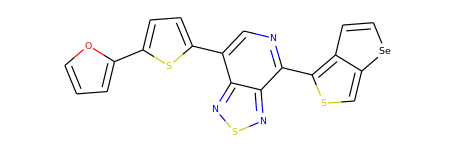

In [19]:
m1 = Chem.MolFromSmiles('c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2nsnc12')
m2 = Chem.MolFromSmiles('C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[SiH2]C=c12')
m1

In [3]:
feats = factory.GetFeaturesForMol(m)
feats[0].GetFamily()

'Acceptor'

In [83]:
bit_fp1 = FingerprintMols.FingerprintMol(m1) #this returns 2048 bits
bit_fp2 = FingerprintMols.FingerprintMol(m2)
len([f for f in bit_fp1])

2048

In [42]:
Descriptors.fr_Ar_NH(m1)

0

In [64]:
f1 = gzip.open('test.csv.gz', 'rb')
f2 = gzip.open('fingerprintmols_test.csv.gz', 'wb')
reader = csv.reader(f1)
writer = csv.writer(f2, delimiter=',')
next(f1, None)

fbuf = io.BufferedReader(f1)
outlines = []
for j, line in enumerate(fbuf):
    smile = line.split(',', 2)[1]
    l = [f for f in FingerprintMols.FingerprintMol(Chem.MolFromSmiles(smile))]
    outlines += [','.join(map(str, [smile] + l)) + '\n']
    if j % 1024 == 0:
        f2.writelines(outlines)
        outlines = []
f2.close()